In [1]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
base_treinamento = pd.read_csv('datasets_2018/petr4_treinamento_ex.csv')

base_teste = pd.read_csv('datasets_2018/petr4_teste_ex.csv')

In [3]:
base_treinamento

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1340,2018-05-21,26.100000,26.290001,24.940001,25.049999,25.000000,75971900.0
1341,2018-05-22,24.809999,25.290001,24.150000,24.709999,24.709999,88109900.0
1342,2018-05-23,24.230000,24.480000,23.270000,23.270000,23.270000,74622500.0
1343,2018-05-24,20.049999,20.750000,19.650000,20.080000,20.080000,240343800.0


In [4]:
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-28,19.200001,19.200001,16.910000,16.910000,16.910000,134504900
1,2018-05-29,18.000000,19.440001,17.600000,19.299999,19.299999,181509800
2,2018-05-30,18.389999,19.969999,18.129999,18.980000,18.980000,125430000
3,2018-06-01,19.559999,19.750000,14.900000,16.160000,16.160000,216954700
4,2018-06-04,17.290001,17.639999,17.049999,17.530001,17.530001,93547600
5,2018-06-05,17.360001,17.799999,16.590000,16.590000,16.590000,67006400
6,2018-06-06,16.469999,16.680000,15.870000,16.330000,16.330000,69496800
7,2018-06-07,16.000000,16.160000,14.930000,15.760000,15.760000,118752700
8,2018-06-08,15.810000,16.190001,15.060000,15.250000,15.250000,91461500
9,2018-06-11,15.500000,15.800000,15.130000,15.410000,15.410000,44872500


In [5]:
#verificando e limpando dados nulos
base_treinamento.isnull().sum()
base_treinamento = base_treinamento.dropna()

base_teste.isnull().sum()
base_teste = base_teste.dropna()


In [6]:
base_treinamento = base_treinamento.iloc[:, 1:2].values #apenas a coluna de abertura

normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)


In [7]:
X = []
y = []
for i in range(90, len(base_treinamento_normalizada)):
    X.append(base_treinamento_normalizada[i-90: i, 0])
    y.append(base_treinamento_normalizada[i, 0])

X, y = np.array(X), np.array(y)


In [8]:
regressor = Sequential()

regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1, activation='linear'))

regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])


c:\Users\andre\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
regressor.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0559 - mean_absolute_error: 0.1735
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0139 - mean_absolute_error: 0.0923
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0135 - mean_absolute_error: 0.0891
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0124 - mean_absolute_error: 0.0846
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0101 - mean_absolute_error: 0.0765
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0086 - mean_absolute_error: 0.0724
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0066 - mean_absolute_error: 0.0612
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0065 - mean_absolute_error: 0.0617
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0060 - mean_absolute_error: 0.0576
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0061 - mean_absolute_error: 0.0596
Epoch 11/100
40/40 ━━━━━━━━━━

In [13]:
base_treinamento_ex = pd.read_csv('datasets_2018/petr4_treinamento_ex.csv')
base_teste_ex = pd.read_csv('datasets_2018/petr4_teste_ex.csv')
base_completa = pd.concat((base_treinamento_ex['Open'], base_teste_ex['Open']), axis=0)

#preparar os dados de entrada a partir das ultimas 90 observações antes do inicio do teste
entradas = base_completa[len(base_completa) - len(base_teste_ex) - 90:].values
entradas = entradas.reshape(-1, 1)

entradas = normalizador.transform(entradas)

X_teste = []
for i in range(90, len(entradas)):
    X_teste.append(entradas[i-90: i, 0])

X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Mean Absolute Error: 1.1984364069310238


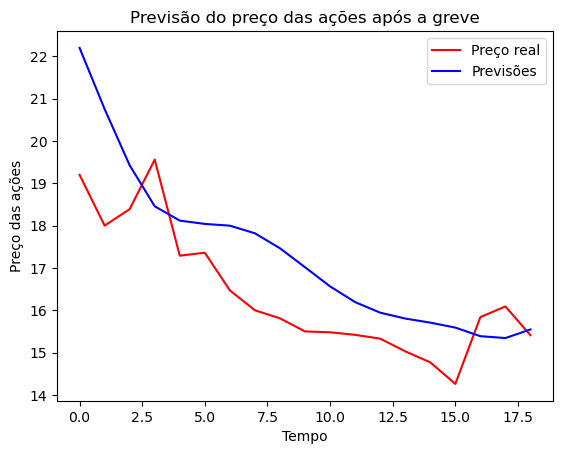

In [14]:
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

from sklearn.metrics import mean_absolute_error
erro = mean_absolute_error(base_teste.iloc[:, 1:2].values, previsoes)
print(f'Mean Absolute Error: {erro}')

plt.plot(base_teste.iloc[:, 1:2].values, color='red', label='Preço real')
plt.plot(previsoes, color='blue', label='Previsões')
plt.title('Previsão do preço das ações após a greve')
plt.xlabel('Tempo')
plt.ylabel('Preço das ações')
plt.legend()
plt.show()
